In [1]:
#Importiong the libraries
import pandas as pd
import numpy as np

#Importing the modelling libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import KFold
from imblearn.over_sampling import RandomOverSampler


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
#loading the dataset
df_pred= pd.read_csv('Data/diabetes_prediction_dataset.csv')
df_pred

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [3]:
#Displaying the number of labels
df_pred['diabetes'].unique()

array([0, 1], dtype=int64)

## Data Understanding

In [4]:
#Checking for the rows and columns in the prediction dataset
df_pred.shape

(100000, 9)

There are 9 columns and 100000 rows

In [5]:
#displaying the prediction columns
df_pred.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [6]:
#dispaying the datatypes
print(df_pred.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB
None


In [7]:
#Checking for missing values in the prediction dataset
df_pred.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [8]:
#Plotting boxplots to check for outliers

import matplotlib.pyplot as plt
import seaborn as sns

# Defining the subplot grid
def boxplot_plot(df):
    for idx, column in enumerate(df.columns):
        plt.figure(figsize=(20, 5))
        plt.title('Distribution of the ' + column + ' column', fontsize=20)
        ax = plt.gca()
        sns.boxplot(data=df_diab_012, x=column, ax=ax)
        plt.show()


In [9]:
#Plotting histograms for the columns
def histogram_plot(df):
  for column in df:
        plt.figure(figsize=(20,5))
        plt.title('Distribution of the ' + column+ ' column',fontsize=(20))
        sns.histplot(data=df, x=column)

## CNN Modelling

In [10]:
df_pred.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [11]:
df_pred.age.unique()

array([80.  , 54.  , 28.  , 36.  , 76.  , 20.  , 44.  , 79.  , 42.  ,
       32.  , 53.  , 78.  , 67.  , 15.  , 37.  , 40.  ,  5.  , 69.  ,
       72.  ,  4.  , 30.  , 45.  , 43.  , 50.  , 41.  , 26.  , 34.  ,
       73.  , 77.  , 66.  , 29.  , 60.  , 38.  ,  3.  , 57.  , 74.  ,
       19.  , 46.  , 21.  , 59.  , 27.  , 13.  , 56.  ,  2.  ,  7.  ,
       11.  ,  6.  , 55.  ,  9.  , 62.  , 47.  , 12.  , 68.  , 75.  ,
       22.  , 58.  , 18.  , 24.  , 17.  , 25.  ,  0.08, 33.  , 16.  ,
       61.  , 31.  ,  8.  , 49.  , 39.  , 65.  , 14.  , 70.  ,  0.56,
       48.  , 51.  , 71.  ,  0.88, 64.  , 63.  , 52.  ,  0.16, 10.  ,
       35.  , 23.  ,  0.64,  1.16,  1.64,  0.72,  1.88,  1.32,  0.8 ,
        1.24,  1.  ,  1.8 ,  0.48,  1.56,  1.08,  0.24,  1.4 ,  0.4 ,
        0.32,  1.72,  1.48])

Where 0 depicts the patient does not have diabetes and 1 depicts the person has diabetes

In [12]:
#checking for missing values
df_pred.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [13]:
#Defining a function to determine the threshold of the outliers
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.10)
    quartile3 = dataframe[variable].quantile(0.90)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit


In [14]:
#Determining presence of outliers
def has_outliers(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    if dataframe[(dataframe[variable] < low_limit) | (dataframe[variable] > up_limit)].any(axis=None):
        print(variable, "yes")

In [15]:
df_pred.hypertension.unique()

array([0, 1], dtype=int64)

In [16]:
# Looping through each column in the DataFrame and check for outliers
for col in df_pred.columns:
  if col not in ['gender','smoking_history','diabetes','heart_disease','hypertension']:
    has_outliers(df_pred, col)

bmi yes


In [17]:
#Writing a function to set a threshold to cap the outliers
def replace_with_thresholds(dataframe, numeric_columns):
    for variable in numeric_columns:
        low_limit, up_limit = outlier_thresholds(dataframe, variable)
        dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
        dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [18]:
#Replacing the outliers with the thresholds for the numeric columns.
Numeric_col = [col for col in df_pred.columns if col not in ['gender','smoking_history','diabetes','heart_disease','hypertension']]
replace_with_thresholds(df_pred, Numeric_col)


In [19]:
#Confirming if the outliers have been resolved
for col in df_pred.columns:
  if col not in ['gender','smoking_history','diabetes','heart_disease','hypertension']:
    has_outliers(df_pred, col)

There are no outliers observed

In [20]:
#Displaying the measures of central tendancy of the dataset
df_pred.describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99]).T

,count,mean,std,min,5%,25%,50%,75%,90%,95%,99%,max
age,100000.0,41.885856,22.516840,0.08,4.00,24.00,43.00,60.00,73.00,80.00,80.0000,80.000
hypertension,100000.0,0.074850,0.263150,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.0000,1.000
heart_disease,100000.0,0.039420,0.194593,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.0000,1.000
bmi,100000.0,27.312972,6.589253,10.01,16.82,23.63,27.32,29.58,35.47,39.49,48.7901,59.905
HbA1c_level,100000.0,5.527507,1.070672,3.50,3.50,4.80,5.80,6.20,6.60,6.60,8.8000,9.000
blood_glucose_level,100000.0,138.058060,40.708136,80.00,80.00,100.00,140.00,159.00,200.00,200.00,280.0000,300.000
diabetes,100000.0,0.085000,0.278883,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.0000,1.000


## Data Modelling

In [21]:
# Splitting Data into Features and Labels
X = df_pred.drop(['diabetes'], axis=1)  # Replace 'target_column' with the actual target column name
y = df_pred['diabetes']

# Label Encoding for Categorical Columns
label_encoder = LabelEncoder()
X_encoded = X.copy()
for col in X_encoded.columns:
    if X_encoded[col].dtype == 'object':
        X_encoded[col] = label_encoder.fit_transform(X_encoded[col])

# Feature Scaling (MinMax Scaling)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Model Hyperparameters
epochs = 10
batch_size = 32
n_splits = 5

# Performing Cross-Validation
cv = KFold(n_splits=n_splits, shuffle=True, random_state=42)  # 5-fold cross-validation
scoring = {'precision': 'precision', 'recall': 'recall', 'f1': 'f1'}
precision_scores, recall_scores, f1_scores = [], [], []

for train_idx, test_idx in cv.split(X_scaled):
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # Model Selection and Building
    model = Sequential()
    model.add(Dense(32, activation='relu', input_shape=(X_scaled.shape[1],)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # For binary classification, use 'sigmoid' activation for the output layer

    # Model Compilation
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Model Training
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)

    # Model Evaluation (Precision, Recall, F1-score)
    y_pred = model.predict(X_test)
    y_pred = (y_pred > 0.5).astype(int)  # Converting the probabilities to binary predictions

    precision_scores.append(precision_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))

# Calculating the Mean and Standard Deviation of Evaluation Metrics
print("Precision Scores:", precision_scores)
print("Mean Precision:", np.mean(precision_scores))
print("Recall Scores:", recall_scores)
print("Mean Recall:", np.mean(recall_scores))
print("F1 Scores:", f1_scores)
print("Mean F1-score:", np.mean(f1_scores))



Epoch 1/10
2500/2500 [==============================] - 4s 1ms/step - loss: 0.1440 - accuracy: 0.9504
Epoch 2/10
2500/2500 [==============================] - 3s 1ms/step - loss: 0.1147 - accuracy: 0.9603
Epoch 3/10
2500/2500 [==============================] - 3s 1ms/step - loss: 0.1115 - accuracy: 0.9615
Epoch 4/10
2500/2500 [==============================] - 3s 1ms/step - loss: 0.1070 - accuracy: 0.9634
Epoch 5/10
2500/2500 [==============================] - 3s 1ms/step - loss: 0.1003 - accuracy: 0.9661
Epoch 6/10
2500/2500 [==============================] - 3s 1ms/step - loss: 0.0966 - accuracy: 0.9673
Epoch 7/10
2500/2500 [==============================] - 3s 1ms/step - loss: 0.0937 - accuracy: 0.9684
Epoch 8/10
2500/2500 [==============================] - 3s 1ms/step - loss: 0.0921 - accuracy: 0.9689
Epoch 9/10
2500/2500 [==============================] - 3s 1ms/step - loss: 0.0901 - accuracy: 0.9697
Epoch 10/10
625/625 [==============================] - 1s 969us/step
Epoch 1/10
25

The results obtained before tuning are as follows:
---
Mean Precision: 0.9527796794625936
---
Mean Recall: 0.6628011196639126
---
Mean F1-score: 0.7778072381482287
---

Plotting for the Training and Validation Loss graphs to check for underfitting and overfitting

Performing hyper parameter tuning using cross-validation

Epoch 1/50
2500/2500 [==============================] - 5s 2ms/step - loss: 0.1432 - accuracy: 0.9522 - val_loss: 0.1169 - val_accuracy: 0.9589
Epoch 2/50
2500/2500 [==============================] - 4s 2ms/step - loss: 0.1160 - accuracy: 0.9597 - val_loss: 0.1138 - val_accuracy: 0.9599
Epoch 3/50
2500/2500 [==============================] - 4s 2ms/step - loss: 0.1147 - accuracy: 0.9602 - val_loss: 0.1174 - val_accuracy: 0.9599
Epoch 4/50
2500/2500 [==============================] - 4s 2ms/step - loss: 0.1134 - accuracy: 0.9615 - val_loss: 0.1117 - val_accuracy: 0.9614
Epoch 5/50
2500/2500 [==============================] - 4s 2ms/step - loss: 0.1108 - accuracy: 0.9623 - val_loss: 0.1067 - val_accuracy: 0.9632
Epoch 6/50
2500/2500 [==============================] - 4s 2ms/step - loss: 0.1042 - accuracy: 0.9645 - val_loss: 0.1026 - val_accuracy: 0.9640
Epoch 7/50
2500/2500 [==============================] - 4s 2ms/step - loss: 0.1003 - accuracy: 0.9658 - val_loss: 0.1004 - val_accuracy:

2500/2500 [==============================] - 4s 2ms/step - loss: 0.1064 - accuracy: 0.9638 - val_loss: 0.1061 - val_accuracy: 0.9649
Epoch 8/50
2500/2500 [==============================] - 4s 2ms/step - loss: 0.1045 - accuracy: 0.9641 - val_loss: 0.0997 - val_accuracy: 0.9659
Epoch 9/50
2500/2500 [==============================] - 5s 2ms/step - loss: 0.1013 - accuracy: 0.9647 - val_loss: 0.1020 - val_accuracy: 0.9631
Epoch 10/50
2500/2500 [==============================] - 4s 2ms/step - loss: 0.0995 - accuracy: 0.9655 - val_loss: 0.1039 - val_accuracy: 0.9633
Epoch 11/50
2500/2500 [==============================] - 4s 2ms/step - loss: 0.0989 - accuracy: 0.9661 - val_loss: 0.1015 - val_accuracy: 0.9647
Epoch 12/50
2500/2500 [==============================] - 4s 1ms/step - loss: 0.0973 - accuracy: 0.9663 - val_loss: 0.0962 - val_accuracy: 0.9667
Epoch 13/50
2500/2500 [==============================] - 4s 2ms/step - loss: 0.0962 - accuracy: 0.9673 - val_loss: 0.0932 - val_accuracy: 0.9682

2500/2500 [==============================] - 5s 2ms/step - loss: 0.0861 - accuracy: 0.9700 - val_loss: 0.0861 - val_accuracy: 0.9704
Epoch 14/50
2500/2500 [==============================] - 4s 2ms/step - loss: 0.0853 - accuracy: 0.9706 - val_loss: 0.0870 - val_accuracy: 0.9701
Epoch 15/50
2500/2500 [==============================] - 6s 2ms/step - loss: 0.0849 - accuracy: 0.9706 - val_loss: 0.0898 - val_accuracy: 0.9679
Epoch 16/50
2500/2500 [==============================] - 5s 2ms/step - loss: 0.0844 - accuracy: 0.9706 - val_loss: 0.0867 - val_accuracy: 0.9704
Epoch 17/50
2500/2500 [==============================] - 4s 1ms/step - loss: 0.0841 - accuracy: 0.9710 - val_loss: 0.0865 - val_accuracy: 0.9693
Epoch 18/50
2500/2500 [==============================] - 4s 1ms/step - loss: 0.0842 - accuracy: 0.9708 - val_loss: 0.0851 - val_accuracy: 0.9707
Epoch 19/50
2500/2500 [==============================] - 4s 1ms/step - loss: 0.0837 - accuracy: 0.9711 - val_loss: 0.0891 - val_accuracy: 0.96

2500/2500 [==============================] - 4s 2ms/step - loss: 0.0860 - accuracy: 0.9704 - val_loss: 0.0823 - val_accuracy: 0.9708
Epoch 20/50
2500/2500 [==============================] - 4s 1ms/step - loss: 0.0857 - accuracy: 0.9705 - val_loss: 0.0814 - val_accuracy: 0.9720
Epoch 21/50
2500/2500 [==============================] - 4s 1ms/step - loss: 0.0858 - accuracy: 0.9701 - val_loss: 0.0801 - val_accuracy: 0.9725
Epoch 22/50
2500/2500 [==============================] - 4s 1ms/step - loss: 0.0851 - accuracy: 0.9705 - val_loss: 0.0800 - val_accuracy: 0.9719
Epoch 23/50
2500/2500 [==============================] - 4s 1ms/step - loss: 0.0849 - accuracy: 0.9706 - val_loss: 0.0798 - val_accuracy: 0.9727
Epoch 24/50
2500/2500 [==============================] - 4s 1ms/step - loss: 0.0849 - accuracy: 0.9705 - val_loss: 0.0799 - val_accuracy: 0.9724
Epoch 25/50
2500/2500 [==============================] - 4s 1ms/step - loss: 0.0842 - accuracy: 0.9709 - val_loss: 0.0806 - val_accuracy: 0.97

2500/2500 [==============================] - 4s 2ms/step - loss: 0.0827 - accuracy: 0.9711 - val_loss: 0.0861 - val_accuracy: 0.9714
Epoch 26/50
2500/2500 [==============================] - 4s 2ms/step - loss: 0.0815 - accuracy: 0.9719 - val_loss: 0.0854 - val_accuracy: 0.9707
Epoch 27/50
2500/2500 [==============================] - 4s 2ms/step - loss: 0.0818 - accuracy: 0.9716 - val_loss: 0.0848 - val_accuracy: 0.9715
Epoch 28/50
2500/2500 [==============================] - 4s 2ms/step - loss: 0.0815 - accuracy: 0.9718 - val_loss: 0.0858 - val_accuracy: 0.9704
Epoch 29/50
2500/2500 [==============================] - 4s 2ms/step - loss: 0.0815 - accuracy: 0.9716 - val_loss: 0.0873 - val_accuracy: 0.9698
Epoch 30/50
2500/2500 [==============================] - 6s 2ms/step - loss: 0.0819 - accuracy: 0.9714 - val_loss: 0.0952 - val_accuracy: 0.9667
Epoch 31/50
2500/2500 [==============================] - 4s 2ms/step - loss: 0.0815 - accuracy: 0.9716 - val_loss: 0.0872 - val_accuracy: 0.96

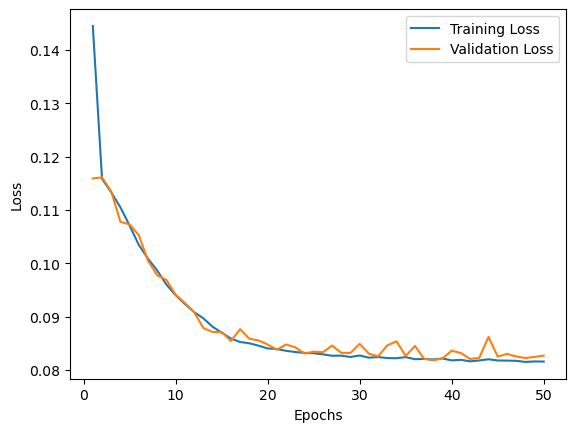

In [22]:
# Model Hyperparameters
epochs = 50
batch_size = 32
n_splits = 5

# Perform Cross-Validation
cv = KFold(n_splits=n_splits, shuffle=True, random_state=42)  # 5-fold cross-validation
scoring = {'precision': 'precision', 'recall': 'recall', 'f1': 'f1'}
precision_scores, recall_scores, f1_scores = [], [], []
training_losses, validation_losses = [], []

for train_idx, test_idx in cv.split(X_scaled):
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # Step 4: Model Selection and Building
    model = Sequential()
    model.add(Dense(32, activation='relu', input_shape=(X_scaled.shape[1],)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # For binary classification, use 'sigmoid' activation for the output layer

    # Step 5: Model Compilation
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Step 6: Model Training
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))

    # Store Training and Validation Losses
    training_losses.append(history.history['loss'])
    validation_losses.append(history.history['val_loss'])

    # Step 7: Model Evaluation (Precision, Recall, F1-score)
    y_pred = model.predict(X_test)
    y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

    precision_scores.append(precision_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))

# Calculate Mean and Standard Deviation of Evaluation Metrics
print("Precision Scores:", precision_scores)
print("Mean Precision:", np.mean(precision_scores))
print("Recall Scores:", recall_scores)
print("Mean Recall:", np.mean(recall_scores))
print("F1 Scores:", f1_scores)
print("Mean F1-score:", np.mean(f1_scores))

# Plot Training and Validation Loss Curves
mean_training_loss = np.mean(training_losses, axis=0)
mean_validation_loss = np.mean(validation_losses, axis=0)
epochs_range = range(1, epochs + 1)

#plotting for the Train and Validation curves

plt.plot(epochs_range, mean_training_loss, label='Training Loss')
plt.plot(epochs_range, mean_validation_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


After parameter tuning using cross-validation, the results are as follows:
---
Mean Precision: 0.9889475375662571
---
Mean Recall: 0.6756253791827906
---
Mean F1-score: 0.8027126832856661
---

Saving the model in a directory

In [23]:

import joblib
import os

#Dedfining the directory to save the model
save_dir = 'Diabetes_CNN_model'

# Creating the directory
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Defining the filename for the model
model_filename = 'CNN_model_diab_pred.pkl'

# Creating the full file path by joining the directory and filename
file_path = os.path.join(save_dir, model_filename)

# saving the model using joblib.dump()
joblib.dump(model, file_path)


['Diabetes_CNN_model\\CNN_model_diab_pred.pkl']

Creating a confusion matrix

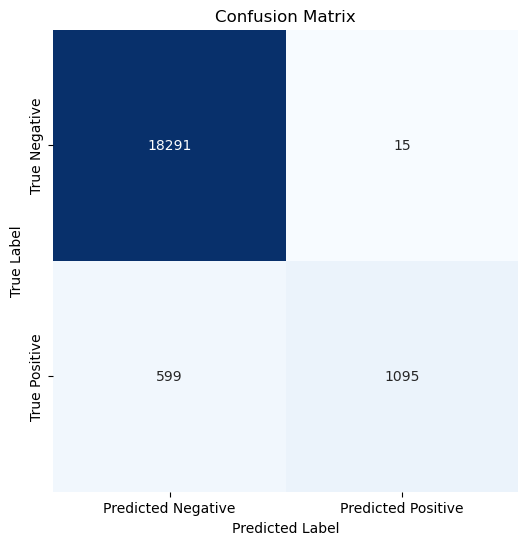

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix  # Import the confusion_matrix function
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Plot Confusion Matrix

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['True Negative', 'True Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

We observed the following results:

---


True Negatives - 18288
---
False Positives - 18
---
False Negatives - 552
---
True Positives - 1142
---


In [25]:
import joblib
# Saving the best model as a file using joblib
CNN_bestmodel = 'best_model.joblib'  # Specify the desired file name
joblib.dump(model, CNN_bestmodel)

['best_model.joblib']

## Deployment

In [26]:
#Converting the train data to a dataframe to facilitate deployment
X_train_1 = pd.DataFrame(X_train)
type(X_train_1)

pandas.core.frame.DataFrame

In [ ]:
# Function to preprocess the user input data
def preprocess_user_data(user_data):
    # Encode gender
    user_data['gender'] = user_data['gender'].apply(lambda x: 1 if x.lower() == 'male' else 0)

    # Encode smoking_history
    smoking_mapping = {
        'never': 4,
        'No Info': 0,
        'current': 1,
        'former': 3,
        'ever': 2,
        'not current': 5
    }
    user_data['smoking_history'] = user_data['smoking_history'].map(smoking_mapping)

    return user_data

# Function to take input from the user and make predictions
def predict_diabetes(model_):
    # Get user input for features
    gender = input("Enter gender (Male/Female): ")
    age = float(input("Enter age: "))
    hypertension = int(input("Enter hypertension (0 for No, 1 for Yes): "))
    heart_disease = int(input("Enter heart disease (0 for No, 1 for Yes): "))
    smoking_history = input("Enter smoking history (never/No Info/current/former/ever/not current): ")
    bmi = float(input("Enter BMI: "))
    hba1c_level = float(input("Enter HbA1c level: "))
    blood_glucose_level = int(input("Enter blood glucose level: "))

    # Create a DataFrame with the user input
    user_data = pd.DataFrame({
        'gender': [gender],
        'age': [age],
        'hypertension': [hypertension],
        'heart_disease': [heart_disease],
        'smoking_history': [smoking_history],
        'bmi': [bmi],
        'HbA1c_level': [hba1c_level],
        'blood_glucose_level': [blood_glucose_level]
    })

    # Preprocess user input
    user_data = preprocess_user_data(user_data)

    # Ensure the user input data has the same columns as the training data
    missing_cols = set(X_train_1.columns) - set(user_data.columns)
    for col in missing_cols:
        user_data[col] = 0

    user_data = user_data[X_train_1.columns]

    # Use the trained model to make predictions on the preprocessed user input
    prediction = model.predict(user_data)[0]

    # Interpret the prediction
    if prediction < 0.5:
        print("Based on the input, the person is predicted to NOT have diabetes.")
    else:
        print("Based on the input, the person is predicted to have diabetes.")

# Call the predict_diabetes function to make predictions
predict_diabetes(model)

In [ ]:
predict_diabetes(model)

In [ ]:
# Call the predict_diabetes function to make predictions
predict_diabetes(model)

In [ ]:
# Call the predict_diabetes function to make predictions
predict_diabetes(model)